In [20]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append("../../")
from src.run.common import * 
from src.preprocess.argumentation import *
%matplotlib inline

In [28]:
iternum = "iter1"
# data_dir = "../../submit/unet_101to6_resnet_kernel/1_20180914012716_CV0.7613_PB0.776/{}".format(iternum)
data_dir = "../../submit/unet_101to6_resnet_kernel/2_20180914093404_CV0.7647/{}".format(iternum)
with open("{}/x_test_numpy.pickle".format(data_dir), "rb") as f:
    x_test = pickle.load(f)
with open("{}/x_test_id_numpy.pickle".format(data_dir), "rb") as f:
    x_test_id = pickle.load(f)
with open("{}/pred_test_numpy.pickle".format(data_dir), "rb") as f:
    y_pred = pickle.load(f)
with open("{}/y_test_numpy.pickle".format(data_dir), "rb") as f:
    y_test = pickle.load(f)
with open("{}/depth_test_numpy.pickle".format(data_dir), "rb") as f:
    depth_test = pickle.load(f)
if not os.path.isdir(iternum):
    os.makedirs(iternum)

In [29]:
img_size = 101
filter_num = 100
thresholds = np.array([0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
ious = np.array([iou_metric(y_test.reshape((-1, img_size, img_size)), [filter_image(img, filter_num) for img in y_pred > threshold]) for threshold in thresholds])

In [30]:
diff = np.sqrt(np.sum((y_test - y_pred.reshape(-1, 101, 101, 1)) ** 2, axis=(1, 2, 3)) / img_size**2)

In [31]:
# idxs = np.arange(0, 10)
# idxs = np.argsort(diff)[:-10:-1]
idxs = np.argsort(diff)[:10:1]
fig, ax = plt.subplots(len(idxs), 4, figsize=(10, len(idxs) * 2))
for i in range(len(idxs)):
    tmp = np.squeeze(x_test[idxs[i]]).astype(np.float32)
    ax[i, 0].imshow(np.dstack((tmp,tmp,tmp)))
    tmp = np.squeeze(y_test[idxs[i]]).astype(np.float32)
    ax[i, 1].imshow(np.dstack((tmp,tmp,tmp)))
    tmp = np.squeeze(y_pred[idxs[i]]).astype(np.float32)
    ax[i, 2].imshow(np.dstack((tmp,tmp,tmp)))
    ax[i, 3].text(0, 0.9, "DIFF: {:.5f}".format(diff[idxs[i]]))
    ax[i, 3].text(0, 0.5, "DEPTH: {}".format(depth_test[idxs[i]]))
    ax[i, 3].text(0, 0.1, "ID: {}".format(x_test_id[idxs[i]]))
    
    ax[i, 3].tick_params(labelbottom="off",bottom="off")
    ax[i, 3].tick_params(labelleft="off",left="off")
plt.savefig("{}/best.png".format(iternum))

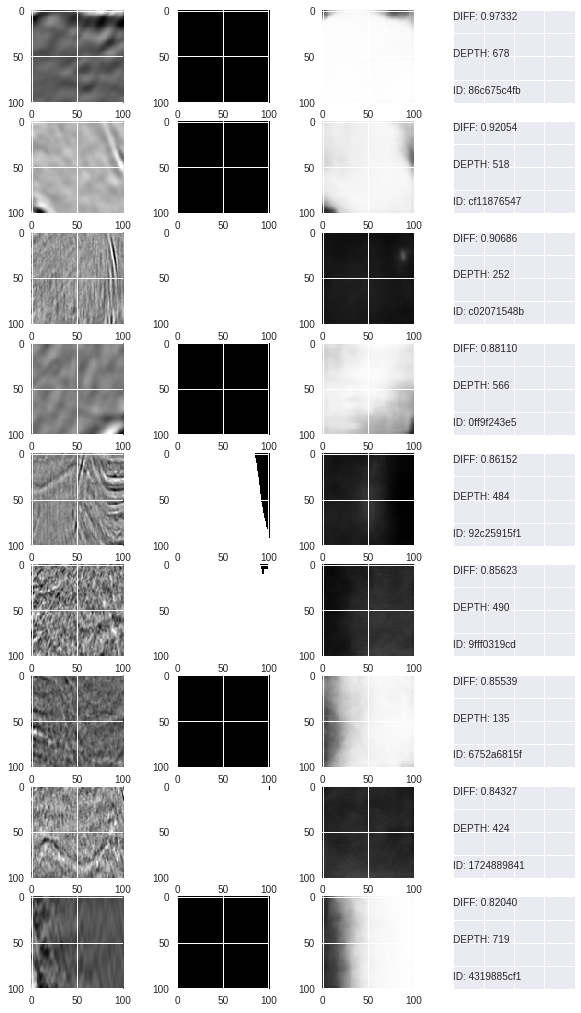

In [32]:
# idxs = np.arange(0, 10)
idxs = np.argsort(diff)[:-10:-1]
# idxs = np.argsort(diff)[:10:1]
fig, ax = plt.subplots(len(idxs), 4, figsize=(10, len(idxs) * 2))
for i in range(len(idxs)):
    tmp = np.squeeze(x_test[idxs[i]]).astype(np.float32)
    ax[i, 0].imshow(np.dstack((tmp,tmp,tmp)))
    tmp = np.squeeze(y_test[idxs[i]]).astype(np.float32)
    ax[i, 1].imshow(np.dstack((tmp,tmp,tmp)))
    tmp = np.squeeze(y_pred[idxs[i]]).astype(np.float32)
    ax[i, 2].imshow(np.dstack((tmp,tmp,tmp)))
    ax[i, 3].text(0, 0.9, "DIFF: {:.5f}".format(diff[idxs[i]]))
    ax[i, 3].text(0, 0.5, "DEPTH: {}".format(depth_test[idxs[i]]))
    ax[i, 3].text(0, 0.1, "ID: {}".format(x_test_id[idxs[i]]))
    
    ax[i, 3].tick_params(labelbottom="off",bottom="off")
    ax[i, 3].tick_params(labelleft="off",left="off")
plt.savefig("{}/worst.png".format(iternum))

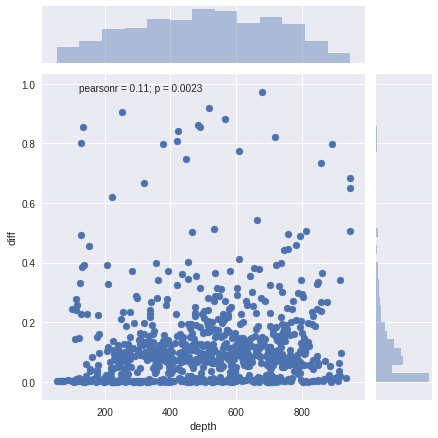

In [33]:
sns.jointplot(depth_test, diff).set_axis_labels("depth", "diff")